In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

import os
import csv

import pickle

In [3]:
preTrainedModel = InceptionV3(weights='imagenet', include_top=False)

with open('E:/Nour_/FCAI/4.2/GP/Nour_model/Saved_models/InceptionV3_weights_Fine-Tuned_Accident_Non-Accident.pkl', 'rb') as f:
    desired_weights_loaded = pickle.load(f)

preTrainedModel.set_weights(desired_weights_loaded)

In [4]:
from keras.models import load_model
                    
model_ = load_model('E:/Nour_/FCAI/4.2/GP/Nour_model/Saved_models/Acciedent_detection.h5', compile = False)

In [5]:
def prepere_input (sample_path, preTrainedModel):
  image_names = []

  for image_name in os.listdir(sample_path):
    if (image_name != '.ipynb_checkpoints'):
      image_name = os.path.splitext(image_name)[0]
      image_names.append(image_name)

  image_names.sort(key=int)
  print(image_names)


  list_of_np = []

  for image_name in image_names:
    print("The image number :",image_name )
    image_name_wExtention = image_name + '.jpg'
    img_path = sample_path + '/' + image_name_wExtention

    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = preTrainedModel.predict(x)

    features = features.reshape(8, 8, 2048)     # now we have np array with shape (8,8,2048)

    list_of_np.append(features)

  list_of_np = np.array(list_of_np)       # now we have np with shape (4,8,8,2048)
  list_of_np = np.expand_dims(list_of_np, axis=0)




  return list_of_np

In [31]:
Acc_folder = 'E:/Nour_/FCAI/4.2/GP/Nour_model/Test_samples/Accident/'
Non_folder = 'E:/Nour_/FCAI/4.2/GP/Nour_model/Test_samples/Non-Accident/'

In [44]:
y_hat_acc = []
for i in os.listdir(Acc_folder):
    sample_path = Acc_folder+i
    feature_map = prepere_input (sample_path, preTrainedModel)
    pred = model_.predict(feature_map)
    pred = (pred >= 0.5).astype(int)
    y_hat_acc.append(pred)


y_hat_Non = []
for i in os.listdir(Non_folder):
    sample_path = Non_folder+i
    feature_map = prepere_input (sample_path, preTrainedModel)
    pred = model_.predict(feature_map)
    pred = (pred >= 0.5).astype(int)
    y_hat_Non.append(pred)


['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']
The image number : 28
1/1 [==============================] - 0s 27ms/step
The image number : 29
1/1 [==============================] - 0s 30ms/step
The image number : 30
1/1 [==============================] - 0s 40ms/step
The image number : 31
1/1 [==============================] - 0s 33ms/step
The image number : 32
1/1 [==============================] - 0s 35ms/step
The image number : 33
1/1 [==============================] - 0s 32ms/step
The image number : 34
1/1 [==============================] - 0s 34ms/step
The image number : 35
1/1 [==============================] - 0s 31ms/step
The image number : 36
1/1 [==============================] - 0s 33ms/step
The image number : 37
1/1 [==============================] - 0s

In [45]:
y_hat_acc = np.array(y_hat_acc)
y_hat_acc = np.squeeze(y_hat_acc)
y_hat_Non = np.array(y_hat_Non)
y_hat_Non = np.squeeze(y_hat_Non)

print(y_hat_acc)
print(y_hat_Non)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0]


In [46]:
y_hat_Non.shape

(16,)

In [47]:
y_acc = np.ones((16,),dtype = int)
y_non = np.zeros((16,),dtype = int)

In [58]:
y_hat = np.concatenate((y_hat_acc, y_hat_Non))
y = np.concatenate(( y_acc,  y_non))

print(y_hat.shape)
print(y_hat.shape)

(32,)
(32,)


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [54]:
! pip install scikit-learn

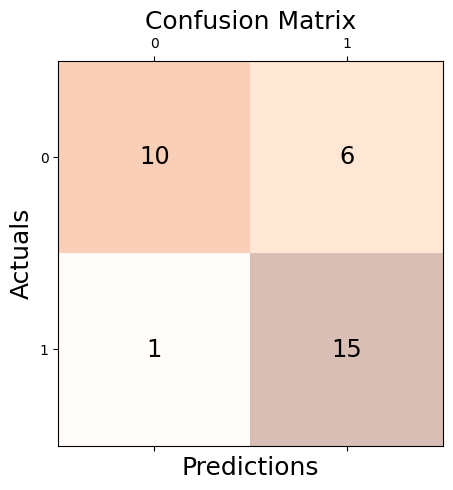

In [61]:
conf_matrix = confusion_matrix(y_true=y , y_pred=y_hat)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [62]:
recall_score = recall_score(y ,y_hat)
precision_score = precision_score(y , y_hat)
f1_score = f1_score(y , y_hat)
accuracy_score = accuracy_score(y , y_hat)

print("recall_score = ",round((recall_score), 2),'\n')
print("precision_score = ",round((precision_score), 2),'\n')
print("f1_score = ",round((f1_score), 2),'\n')
print("accuracy_score = ",round((accuracy_score), 2),'\n')

recall_score =  0.94 

precision_score =  0.71 

f1_score =  0.81 

accuracy_score =  0.78 

